# Decision tree


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import pickle
import os
import scipy.stats as st
from itertools import combinations

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.


In [3]:
model_name = "dtree"
aml_dir = './data/'
train = pd.read_csv(os.path.join(aml_dir, 'nyc_demand_train.csv'), parse_dates=['timeStamp'])

Using randomised search to find optimal hyperparameters

In [4]:
X = train.drop(['demand', 'timeStamp'], axis=1)

In [5]:
regr = DecisionTreeRegressor()
tscv = TimeSeriesSplit(n_splits=3)

In [6]:
param_dist = {'max_depth': st.randint(2, 20),
              'min_samples_split': st.randint(2, 50),
              'min_samples_leaf': st.randint(1, 100),
              'max_features': range(3,X.shape[1]+1)
             }
regr_cv = RandomizedSearchCV(estimator=regr,
            param_distributions=param_dist,
            n_iter=100,
            cv=tscv,
            iid=False,
            scoring='neg_mean_squared_error',
            verbose=2,
            n_jobs=-1)
regr_pipe = Pipeline([('regr_cv', regr_cv)])
regr_pipe.fit(X, y=train['demand'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=2, max_features=16, min_samples_leaf=39, min_samples_split=26 
[CV] max_depth=2, max_features=16, min_samples_leaf=39, min_samples_split=26 
[CV]  max_depth=2, max_features=16, min_samples_leaf=39, min_samples_split=26, total=   0.3s
[CV] max_depth=2, max_features=16, min_samples_leaf=39, min_samples_split=26 
[CV]  max_depth=2, max_features=16, min_samples_leaf=39, min_samples_split=26, total=   0.4s
[CV] max_depth=15, max_features=15, min_samples_leaf=87, min_samples_split=48 
[CV]  max_depth=2, max_features=16, min_samples_leaf=39, min_samples_split=26, total=   0.7s
[CV] max_depth=15, max_features=15, min_samples_leaf=87, min_samples_split=48 
[CV]  max_depth=15, max_features=15, min_samples_leaf=87, min_samples_split=48, total=   0.5s
[CV] max_depth=15, max_features=15, min_samples_leaf=87, min_samples_split=48 
[CV]  max_depth=15, max_features=15, min_samples_leaf=87, min_samples_split=48, total=   1.3s

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.0s


[CV]  max_depth=2, max_features=6, min_samples_leaf=48, min_samples_split=35, total=   0.2s
[CV] max_depth=12, max_features=13, min_samples_leaf=38, min_samples_split=42 
[CV]  max_depth=3, max_features=14, min_samples_leaf=70, min_samples_split=46, total=   0.7s
[CV] max_depth=12, max_features=13, min_samples_leaf=38, min_samples_split=42 
[CV]  max_depth=12, max_features=13, min_samples_leaf=38, min_samples_split=42, total=   0.5s
[CV] max_depth=12, max_features=13, min_samples_leaf=38, min_samples_split=42 
[CV]  max_depth=12, max_features=13, min_samples_leaf=38, min_samples_split=42, total=   1.2s
[CV] max_depth=18, max_features=12, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=18, max_features=12, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] max_depth=18, max_features=12, min_samples_leaf=3, min_samples_split=2 
[CV]  max_depth=12, max_features=13, min_samples_leaf=38, min_samples_split=42, total=   1.9s
[CV] max_depth=18, max_features=12, min_samples_le

[CV] max_depth=3, max_features=16, min_samples_leaf=3, min_samples_split=14 
[CV]  max_depth=3, max_features=16, min_samples_leaf=3, min_samples_split=14, total=   0.3s
[CV] max_depth=3, max_features=16, min_samples_leaf=3, min_samples_split=14 
[CV]  max_depth=3, max_features=16, min_samples_leaf=3, min_samples_split=14, total=   0.5s
[CV] max_depth=3, max_features=16, min_samples_leaf=3, min_samples_split=14 
[CV]  max_depth=5, max_features=16, min_samples_leaf=85, min_samples_split=37, total=   1.7s
[CV] max_depth=8, max_features=14, min_samples_leaf=64, min_samples_split=39 
[CV]  max_depth=8, max_features=14, min_samples_leaf=64, min_samples_split=39, total=   0.4s
[CV] max_depth=8, max_features=14, min_samples_leaf=64, min_samples_split=39 
[CV]  max_depth=3, max_features=16, min_samples_leaf=3, min_samples_split=14, total=   0.7s
[CV] max_depth=8, max_features=14, min_samples_leaf=64, min_samples_split=39 
[CV]  max_depth=8, max_features=14, min_samples_leaf=64, min_samples_spli

[CV]  max_depth=5, max_features=16, min_samples_leaf=73, min_samples_split=49, total=   0.3s
[CV] max_depth=5, max_features=16, min_samples_leaf=73, min_samples_split=49 
[CV]  max_depth=17, max_features=10, min_samples_leaf=11, min_samples_split=21, total=   1.6s
[CV] max_depth=5, max_features=16, min_samples_leaf=73, min_samples_split=49 
[CV]  max_depth=5, max_features=16, min_samples_leaf=73, min_samples_split=49, total=   0.8s
[CV] max_depth=5, max_features=7, min_samples_leaf=6, min_samples_split=35 
[CV]  max_depth=5, max_features=7, min_samples_leaf=6, min_samples_split=35, total=   0.3s
[CV] max_depth=5, max_features=7, min_samples_leaf=6, min_samples_split=35 
[CV]  max_depth=5, max_features=16, min_samples_leaf=73, min_samples_split=49, total=   1.5s
[CV] max_depth=5, max_features=7, min_samples_leaf=6, min_samples_split=35 
[CV]  max_depth=5, max_features=7, min_samples_leaf=6, min_samples_split=35, total=   0.5s
[CV] max_depth=19, max_features=13, min_samples_leaf=80, min_

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min


[CV]  max_depth=7, max_features=17, min_samples_leaf=85, min_samples_split=22, total=   0.5s
[CV] max_depth=7, max_features=17, min_samples_leaf=85, min_samples_split=22 
[CV]  max_depth=7, max_features=17, min_samples_leaf=85, min_samples_split=22, total=   1.2s
[CV] max_depth=7, max_features=17, min_samples_leaf=85, min_samples_split=22 
[CV]  max_depth=13, max_features=17, min_samples_leaf=70, min_samples_split=3, total=   2.6s
[CV] max_depth=14, max_features=5, min_samples_leaf=39, min_samples_split=11 
[CV]  max_depth=14, max_features=5, min_samples_leaf=39, min_samples_split=11, total=   0.2s
[CV] max_depth=14, max_features=5, min_samples_leaf=39, min_samples_split=11 
[CV]  max_depth=14, max_features=5, min_samples_leaf=39, min_samples_split=11, total=   0.9s
[CV] max_depth=14, max_features=5, min_samples_leaf=39, min_samples_split=11 
[CV]  max_depth=14, max_features=5, min_samples_leaf=39, min_samples_split=11, total=   1.1s
[CV] max_depth=17, max_features=4, min_samples_leaf=

[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=39, total=   0.0s
[CV] max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=39 
[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=39, total=   0.2s
[CV] max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=39 
[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=39, total=   0.3s
[CV] max_depth=10, max_features=9, min_samples_leaf=84, min_samples_split=10 
[CV]  max_depth=8, max_features=15, min_samples_leaf=28, min_samples_split=41, total=   1.9s
[CV] max_depth=10, max_features=9, min_samples_leaf=84, min_samples_split=10 
[CV]  max_depth=10, max_features=9, min_samples_leaf=84, min_samples_split=10, total=   0.4s
[CV] max_depth=10, max_features=9, min_samples_leaf=84, min_samples_split=10 
[CV]  max_depth=10, max_features=9, min_samples_leaf=84, min_samples_split=10, total=   1.0s
[CV] max_depth=8, max_features=7, min_samples_leaf=95, min_sam

[CV]  max_depth=19, max_features=17, min_samples_leaf=85, min_samples_split=33, total=   0.6s
[CV] max_depth=19, max_features=17, min_samples_leaf=85, min_samples_split=33 
[CV]  max_depth=11, max_features=12, min_samples_leaf=86, min_samples_split=42, total=   1.8s
[CV] max_depth=19, max_features=17, min_samples_leaf=85, min_samples_split=33 
[CV]  max_depth=19, max_features=17, min_samples_leaf=85, min_samples_split=33, total=   1.4s
[CV] max_depth=11, max_features=13, min_samples_leaf=8, min_samples_split=28 
[CV]  max_depth=11, max_features=13, min_samples_leaf=8, min_samples_split=28, total=   0.6s
[CV] max_depth=11, max_features=13, min_samples_leaf=8, min_samples_split=28 
[CV]  max_depth=19, max_features=17, min_samples_leaf=85, min_samples_split=33, total=   2.4s
[CV] max_depth=11, max_features=13, min_samples_leaf=8, min_samples_split=28 
[CV]  max_depth=11, max_features=13, min_samples_leaf=8, min_samples_split=28, total=   1.6s
[CV] max_depth=18, max_features=7, min_samples

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


Pipeline(memory=None,
     steps=[('regr_cv', RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
          error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_s...=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2))])

In [7]:
with open(os.path.join(aml_dir, model_name + '.pkl'), 'wb') as f:
    pickle.dump(regr_pipe, f)

Cross validation results

In [8]:
cv_results = pd.DataFrame(regr_pipe.named_steps['regr_cv'].cv_results_)
cv_results.sort_values(by='rank_test_score', inplace=True)
cv_results.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
96,1.419327,0.004864,-8047.815835,-3683.118126,14,14,3,22,"{'max_depth': 14, 'max_features': 14, 'min_sam...",1,-11186.391548,-4603.045333,-6563.845970,-3530.287678,-6393.209987,-2916.021366,0.706904,0.001790,2220.401209,697.151502
14,1.546089,0.032440,-8087.498404,-1192.633627,18,12,3,2,"{'max_depth': 18, 'max_features': 12, 'min_sam...",2,-10912.538959,-1482.573786,-6965.920274,-1198.370362,-6384.035979,-896.956733,0.759793,0.019856,2011.680547,239.111572
48,1.435851,0.053050,-8437.748353,-3737.257883,12,13,6,10,"{'max_depth': 12, 'max_features': 13, 'min_sam...",3,-11293.018028,-4142.548635,-7146.276262,-3759.504665,-6873.950769,-3309.720349,0.746324,0.024040,2022.039232,340.364440
97,1.420436,0.015055,-8643.646254,-4440.945892,16,14,6,28,"{'max_depth': 16, 'max_features': 14, 'min_sam...",4,-12031.084506,-5744.812740,-6975.760212,-4182.903499,-6924.094043,-3395.121437,0.684872,0.008663,2395.373427,976.456762
92,1.895805,0.074603,-8793.740604,-3155.412730,16,12,6,3,"{'max_depth': 16, 'max_features': 12, 'min_sam...",5,-11929.735704,-3814.742859,-7764.734992,-3289.471714,-6686.751115,-2362.023618,1.175718,0.050808,2260.731631,600.598122


Inspect the pairwise distribution of cross validation scores. Darker shades of blue indicate superior performance while the red star represents the optimal solution found.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


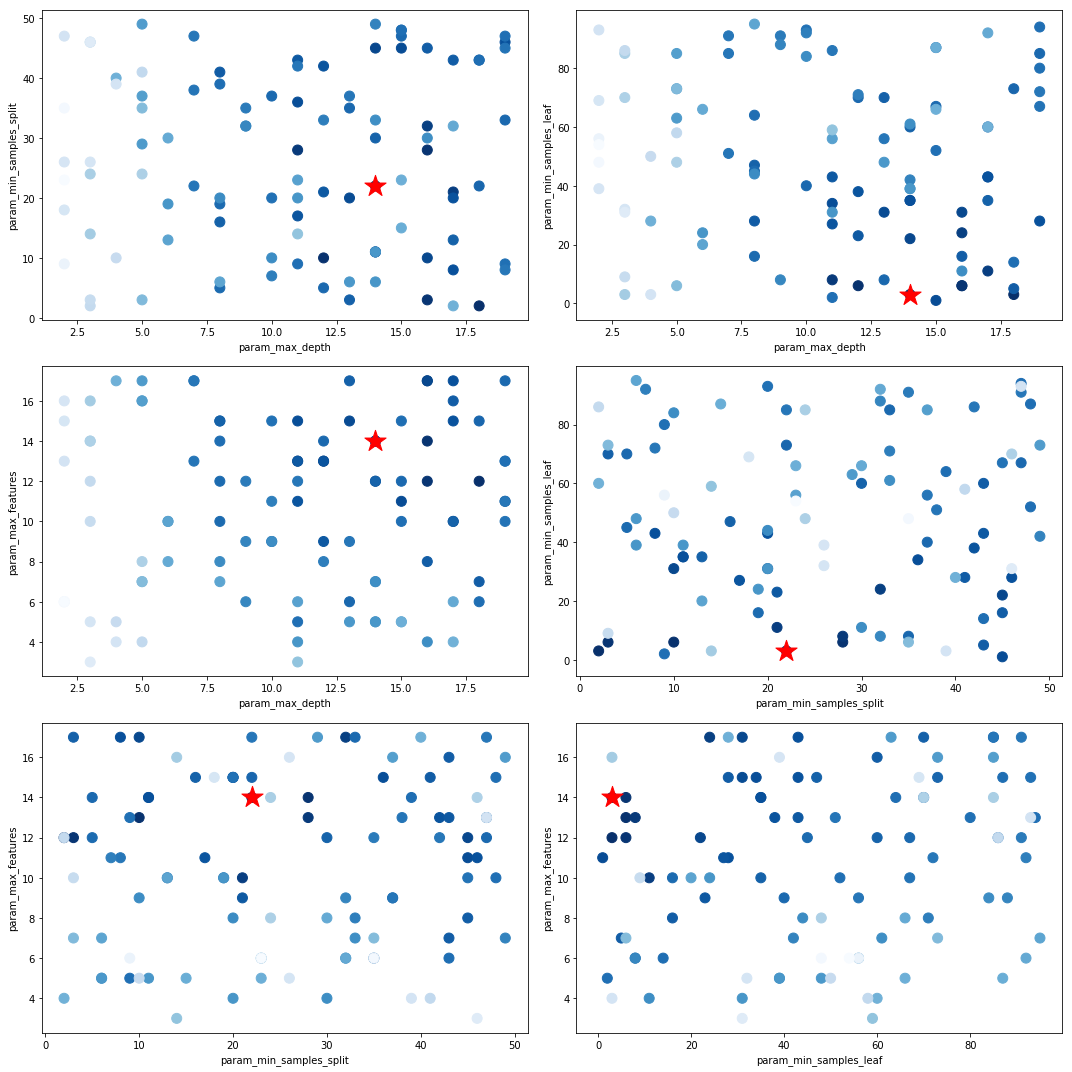

In [9]:
params = ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features']
gs = gridspec.GridSpec(3,2)
fig = plt.figure(figsize=(15, 15), tight_layout=True)
plt_best = cv_results.head(1)
for idx, params in enumerate(combinations(params, 2)):
    ax = fig.add_subplot(gs[idx])
    plt.scatter(cv_results[params[0]], cv_results[params[1]], c=-np.log(-cv_results['mean_test_score']), s=100, cmap="Blues")
    plt.scatter(plt_best[params[0]], plt_best[params[1]], s=500, marker="*", c="r")
    plt.xlabel(params[0])
    plt.ylabel(params[1])

Inspect feature importance

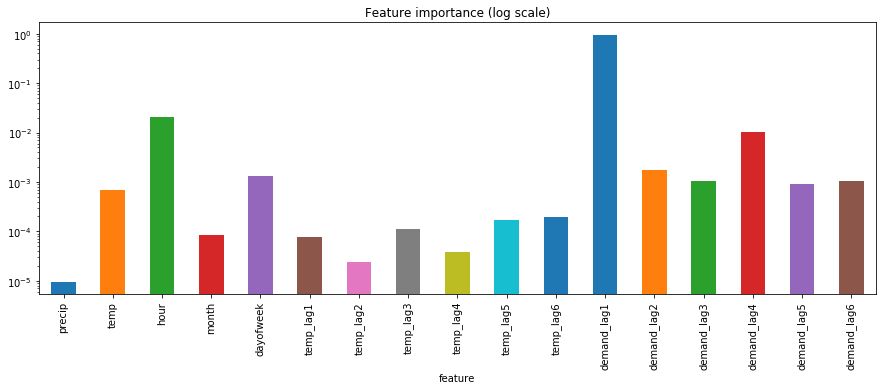

In [10]:
feature_importance = pd.DataFrame.from_dict({'feature':X.columns, 'importance':regr_pipe.named_steps['regr_cv'].best_estimator_.feature_importances_})
feature_importance.plot.bar('feature', 'importance', figsize=(15,5), logy=True, title='Feature importance (log scale)', legend=False)
plt.show()